# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [3]:
df = pd.read_csv('data/nndb_flat.csv')
df

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [4]:
df.describe()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
count,8618.000000,8618.000000,8618.00000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,...,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,15467.757368,226.438617,11.52391,10.647024,21.819062,6.560253,2.023242,93.968786,0.264369,1.225260,...,0.125765,0.213222,0.182499,0.174881,0.061176,0.000191,0.077965,0.222838,0.229363,0.179111
std,9221.428766,169.388910,10.55059,15.866353,27.239000,13.602098,4.313670,779.362205,0.478614,4.319183,...,0.466402,0.302161,0.346062,0.431974,0.167803,0.000615,0.133496,0.290133,0.514406,0.305292
min,1001.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8695.250000,93.000000,2.47000,0.992500,0.040000,0.000000,0.000000,0.000000,0.034250,0.000000,...,0.000000,0.023875,0.035385,0.025000,0.007500,0.000033,0.023810,0.052857,0.001818,0.020909
50%,14273.000000,191.000000,8.28500,5.235000,8.945000,0.370000,0.300000,1.500000,0.120000,0.080000,...,0.017500,0.131250,0.115385,0.064583,0.015833,0.000088,0.047619,0.190000,0.070909,0.076818
75%,20050.750000,336.000000,19.97750,13.900000,32.900000,5.300000,2.400000,21.000000,0.355000,1.297500,...,0.062500,0.314328,0.200000,0.185833,0.051667,0.000161,0.069048,0.308571,0.387273,0.245455
max,93600.000000,902.000000,88.32000,100.000000,100.000000,99.800000,79.000000,30000.000000,12.000000,98.890000,...,14.702500,7.968750,13.461538,19.479167,6.136667,0.016722,1.859524,14.168571,34.854545,8.268182


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [6]:
# Seleccionar únicamente las columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])


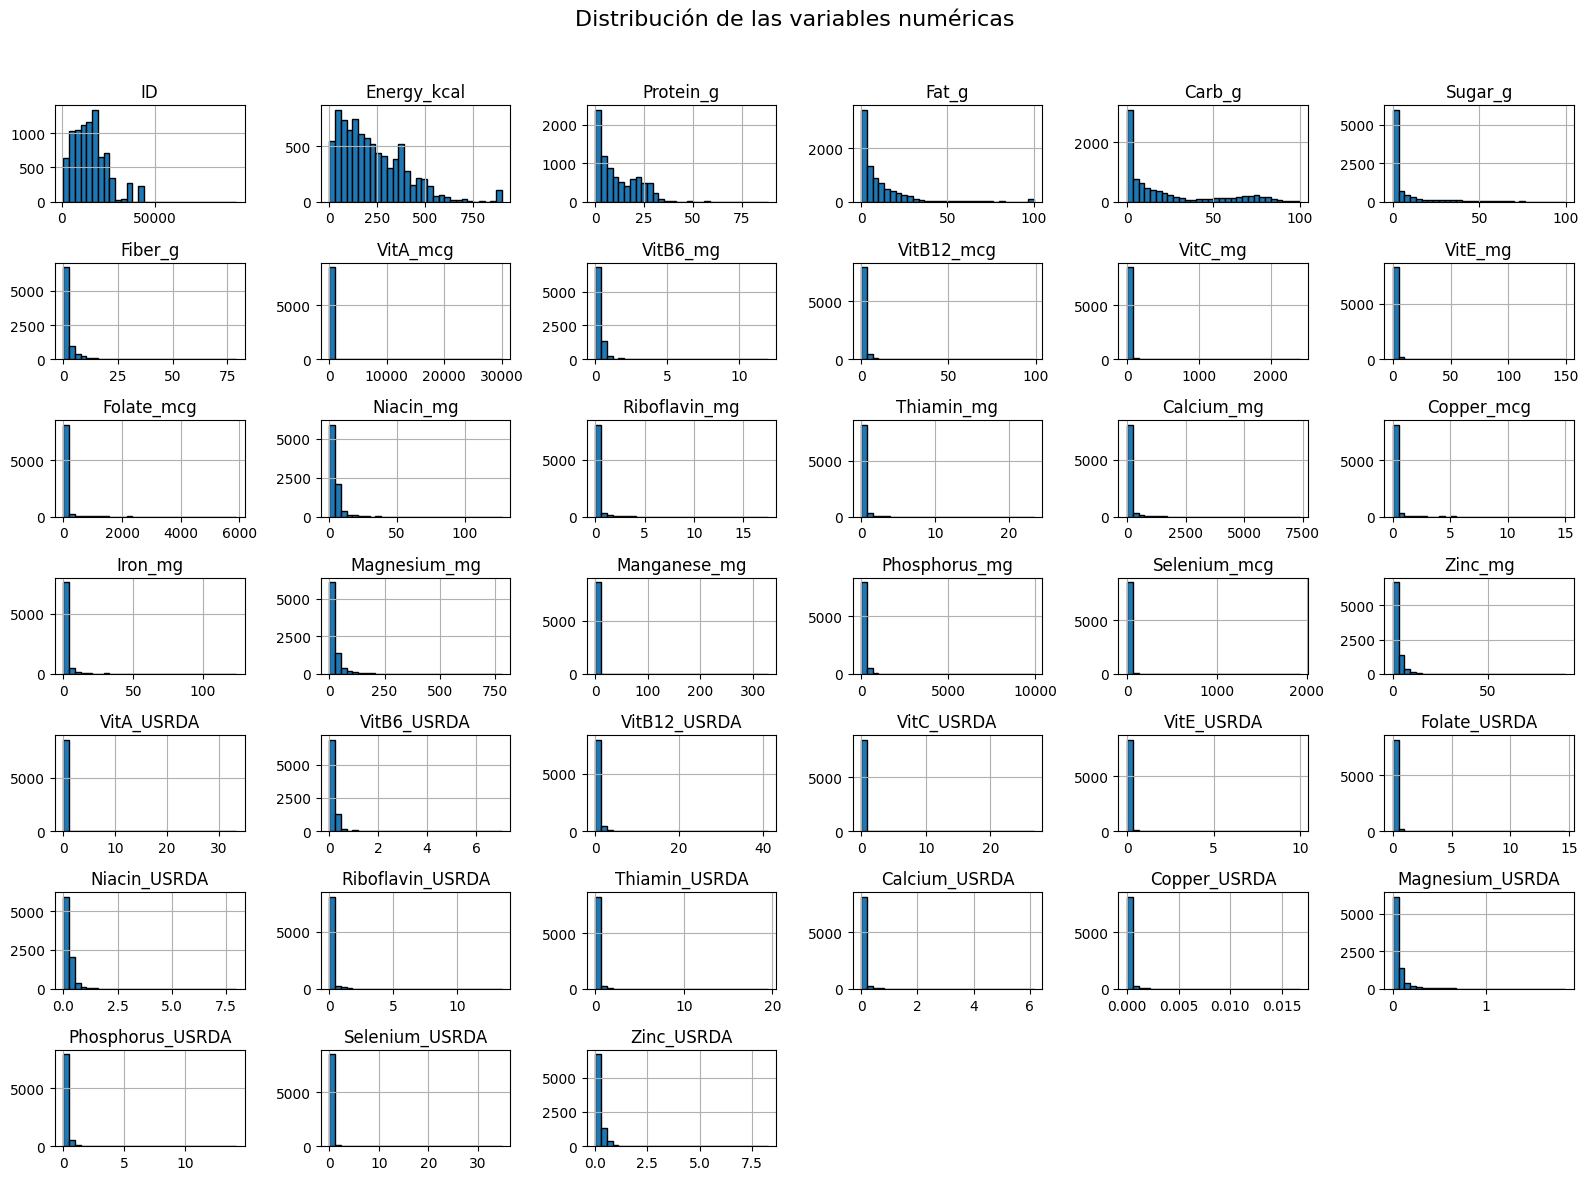

In [7]:
# Histograma de las variables numéricas
df_numeric.hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.suptitle('Distribución de las variables numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

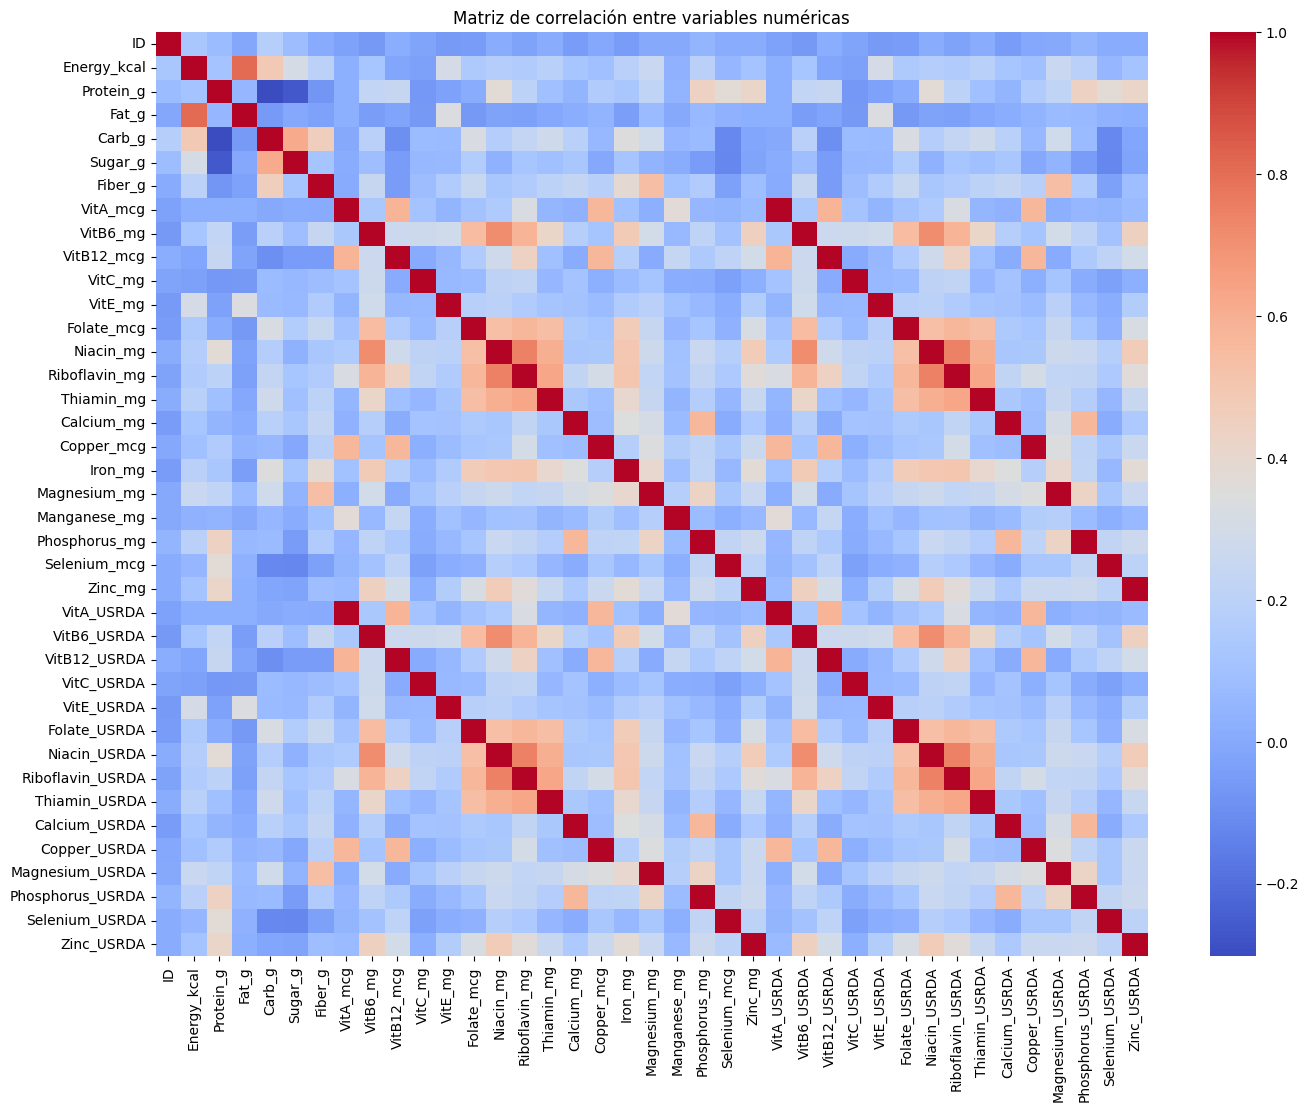

In [ ]:
# Ver la correlación entre las variables numéricas
# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Mostrar el mapa de calor (heatmap) de las correlaciones
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

- Las columnas "%US RDA" son derivadas de otras variables y representan porcentajes de la ingesta diaria recomendada. Son redundantes y colineales con las cantidades absolutas, por lo que se recomienda eliminarlas antes de aplicar PCA para evitar distorsión en los resultados.

In [9]:
# Eliminar columnas que contienen "%US RDA"
df_clean = df.drop(columns=[col for col in df.columns if '%US RDA' in col])

# También puedes actualizar df_numeric
df_numeric_clean = df_clean.select_dtypes(include=[np.number])


### Variables no numéricas
Elimina las variables de texto del dataset

In [10]:
df = df.drop(columns=df.select_dtypes(include=['object', 'string']).columns)


In [11]:
df

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables realizando una transformación Logarítmica.

In [12]:
# Aplicamos log(1 + x) a todas las variables numéricas para reducir asimetría
df_log = np.log1p(df)

# Visualizamos algunas variables transformadas
print(df_log.head())


         ID  Energy_kcal  Protein_g     Fat_g    Carb_g   Sugar_g  Fiber_g  \
0  6.909753     6.576470   0.615186  4.408060  0.058269  0.058269      0.0   
1  6.910751     6.576470   0.615186  4.408060  0.058269  0.058269      0.0   
2  6.911747     6.776507   0.246860  4.609959  0.000000  0.000000      0.0   
3  6.912743     5.869297   3.109061  3.392493  1.205971  0.405465      0.0   
4  6.913737     5.918894   3.188004  3.423611  1.332366  0.412110      0.0   

   VitA_mcg  VitB6_mg  VitB12_mcg  ...  Folate_USRDA  Niacin_USRDA  \
0  6.529419  0.002996    0.157004  ...      0.007472      0.002622   
1  6.529419  0.002996    0.122218  ...      0.007472      0.002622   
2  6.734592  0.001000    0.009950  ...      0.000000      0.000187   
3  5.293305  0.153579    0.797507  ...      0.086178      0.061565   
4  5.680173  0.062975    0.815365  ...      0.048790      0.007348   

   Riboflavin_USRDA  Thiamin_USRDA  Calcium_USRDA  Copper_USRDA  \
0          0.025818       0.004158       0.

### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [18]:
from sklearn.preprocessing import StandardScaler

# Estandarizamos los datos log-transformados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_log)

# Convertimos a DataFrame para mantener nombres de columnas
df_scaled = pd.DataFrame(X_scaled, columns=df_log.columns)

# Verificamos resultados
print(df_scaled.head())


         ID  Energy_kcal  Protein_g     Fat_g    Carb_g   Sugar_g   Fiber_g  \
0 -3.480717     1.540414  -1.379699  2.222526 -1.279339 -0.751381 -0.817818   
1 -3.479343     1.540414  -1.379699  2.222526 -1.279339 -0.751381 -0.817818   
2 -3.477969     1.745661  -1.728220  2.393490 -1.315522 -0.796963 -0.817818   
3 -3.476598     0.814824   0.980084  1.362565 -0.566664 -0.479778 -0.817818   
4 -3.475227     0.865713   1.054782  1.388915 -0.488178 -0.474580 -0.817818   

   VitA_mcg  VitB6_mg  VitB12_mcg  ...  Folate_USRDA  Niacin_USRDA  \
0  2.363105 -0.811366   -0.453749  ...     -0.370982     -0.908747   
1  2.363105 -0.811366   -0.506894  ...     -0.370982     -0.908747   
2  2.463472 -0.819681   -0.678411  ...     -0.406514     -0.921739   
3  1.758419 -0.184016    0.524785  ...      0.003292     -0.594143   
4  1.947668 -0.561485    0.552068  ...     -0.174499     -0.883521   

   Riboflavin_USRDA  Thiamin_USRDA  Calcium_USRDA  Copper_USRDA  \
0         -0.657634      -0.662004   

### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [21]:
from sklearn.decomposition import PCA

# Inicializamos el PCA sin limitar el número de componentes
pca = PCA()
X_pca = pca.fit_transform(df_scaled)

# Convertimos el resultado a DataFrame
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Mostramos las primeras filas del resultado del PCA
print(df_pca.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.872949 -0.041708 -1.059564  2.071717  4.316022 -1.091657  1.947041   
1 -2.856397  0.017080 -1.025593  2.067338  4.304479 -1.034733  1.962871   
2 -3.783940  0.019644 -1.713222  1.630430  5.214884 -0.210496  1.937739   
3  1.661086 -0.848726  0.582730  2.815806  1.032576 -3.945505  2.637959   
4  1.414139 -0.688807  0.940228  3.345741  1.222156 -4.348554  3.254416   

        PC8       PC9      PC10  ...      PC30      PC31      PC32      PC33  \
0  1.691916 -1.727677  0.739112  ...  0.056493  0.129156  0.149302 -0.417508   
1  1.692802 -1.746321  0.758139  ...  0.044740  0.137827  0.133385 -0.395008   
2  1.490594 -2.082953  0.981606  ...  0.092190  0.119968 -0.065519 -0.435743   
3 -0.053281 -1.992908 -0.617967  ... -0.033996 -0.095094 -0.070448  0.034358   
4 -0.483591 -2.027583 -0.633037  ...  0.010452 -0.116656 -0.080985  0.094218   

       PC34      PC35      PC36      PC37      PC38      PC39  
0 -0

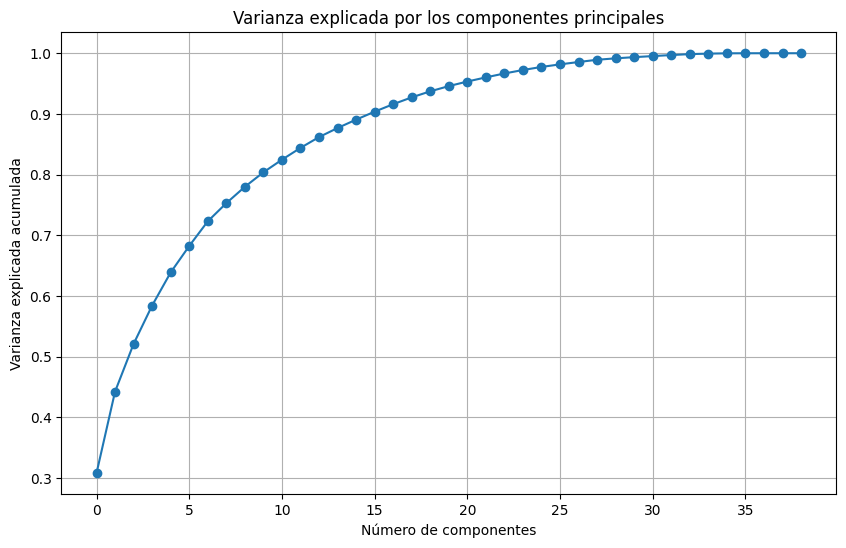

In [22]:
# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Gráfico de varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada por los componentes principales')
plt.grid(True)
plt.show()


### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

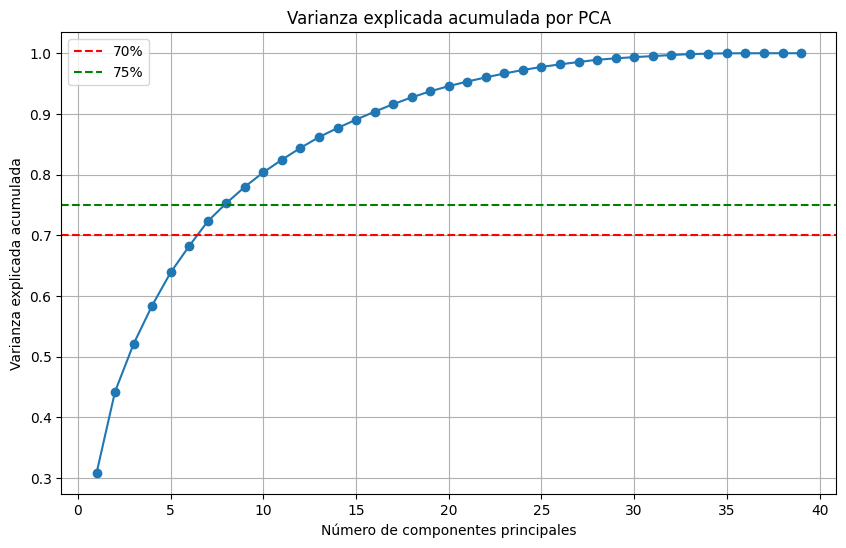


Con 7 componentes se alcanza al menos el 70% de la varianza.


In [16]:
# Varianza explicada acumulada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Diagrama de líneas
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.70, color='r', linestyle='--', label='70%')
plt.axhline(y=0.75, color='g', linestyle='--', label='75%')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada por PCA')
plt.legend()
plt.grid(True)
plt.show()

# Saber cuántos PCs alcanzan el 70-75% de varianza
for i, var in enumerate(cumulative_variance):
    if var >= 0.70:
        print(f"\nCon {i+1} componentes se alcanza al menos el 70% de la varianza.")
        break


## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [26]:
# Crear un nuevo PCA con 7 componentes principales
pca_reduced_7 = PCA(n_components=7)

# Ajustar y transformar los datos escalados
X_pca_reduced_7 = pca_reduced_7.fit_transform(df_scaled)

# Convertir el resultado a DataFrame
df_pca_reduced_7 = pd.DataFrame(X_pca_reduced_7, columns=[f'PC{j+1}' for j in range(7)])

# Mostrar las primeras filas del nuevo dataset reducido
print(df_pca_reduced_7.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7
0 -2.872949 -0.041708 -1.059564  2.071717  4.316022 -1.091657  1.947041
1 -2.856397  0.017080 -1.025593  2.067338  4.304479 -1.034733  1.962871
2 -3.783940  0.019644 -1.713222  1.630430  5.214884 -0.210496  1.937739
3  1.661086 -0.848726  0.582730  2.815806  1.032576 -3.945505  2.637959
4  1.414139 -0.688807  0.940228  3.345741  1.222156 -4.348554  3.254416


### ¿Qué grupo de comida tiene los valores más altos en cada categoría?
Determina para cada Principal Component, los 3 grupos de comida (*FoodGroup*) con los valores del PC más altos.

In [32]:
# Asegurar que la columna 'FoodGroup' esté presente
if 'FoodGroup' not in df.columns:
    df_original = pd.read_csv('data/nndb_flat.csv')
    df['FoodGroup'] = df_original['FoodGroup']

# Concatenar 'FoodGroup' con el DataFrame reducido (con X componentes, en tu caso 7)
df_with_foodgroup = pd.concat([df[['FoodGroup']], df_pca_reduced_7], axis=1)

# Agrupar por 'FoodGroup' y calcular la media de cada componente
group_means = df_with_foodgroup.groupby('FoodGroup').mean()

# Obtener los 3 grupos con mayor media por cada componente principal
top_food_groups = {}
for pc in df_pca_reduced_7.columns:
    top_values = group_means[pc].sort_values(ascending=False).head(3)
    top_food_groups[pc] = top_values

# Mostrar los resultados
for pc, top_values in top_food_groups.items():
    print(f"Top 3 grupos de alimentos con mayor media para {pc}:")
    print(top_values)
    print()


Top 3 grupos de alimentos con mayor media para PC1:
FoodGroup
Breakfast Cereals        6.109026
Nut and Seed Products    3.836293
Spices and Herbs         3.277316
Name: PC1, dtype: float64

Top 3 grupos de alimentos con mayor media para PC2:
FoodGroup
Spices and Herbs         4.524207
Breakfast Cereals        3.075328
Nut and Seed Products    2.522293
Name: PC2, dtype: float64

Top 3 grupos de alimentos con mayor media para PC3:
FoodGroup
Nut and Seed Products      3.743931
Cereal Grains and Pasta    1.912519
Spices and Herbs           1.870691
Name: PC3, dtype: float64

Top 3 grupos de alimentos con mayor media para PC4:
FoodGroup
Spices and Herbs                  2.372647
Dairy and Egg Products            2.003710
Finfish and Shellfish Products    1.615470
Name: PC4, dtype: float64

Top 3 grupos de alimentos con mayor media para PC5:
FoodGroup
Fats and Oils            4.981463
Snacks                   0.826684
Nut and Seed Products    0.698770
Name: PC5, dtype: float64

Top 3 grupos